In [34]:
# Task 1: Select 5 different city names from this file. Write code that will identify all city names that are similar to an input, and run this code against each of the 5 different city names you have chosen.

In [3]:
import pandas as pd
import numpy as np
from Levenshtein import distance as lev
data = pd.read_csv("CS688_Misspelled_City_Names.csv")
data

,Data
0,Abaquerque
1,Abbevile
2,Abbeville
3,Abeville
4,Abilene
...,...
1666,Yuma
1667,Yunkers
1668,Yurba Linda
1669,Zanesvile


In [18]:
# data["Data"][0]

'Abaquerque'

In [20]:
# data["Data"].count()

1671

In [18]:
def similarName_Levenshtein(name):
    my_list = []
    for i in range(0, data["Data"].count()):
        if lev(name, data["Data"][i]) == 0:
            continue
        if lev(name, data["Data"][i]) <= 2:
            my_list.append(data["Data"][i])
    return my_list

In [19]:
cities = ['Berlin', 'Cleveland', 'Houston', 'Phoenix', 'Oakland']
for i in cities:
    list = []
    print("The word", i, "have misspelled version of", similarName_Levenshtein(i))

The word Berlin have misspelled version of ['Berlen', 'Burlin', 'Kerwin']
The word Cleveland have misspelled version of ['Clevland']
The word Houston have misspelled version of ['Boston', 'Hoston', 'Houstin', 'Huoston', 'Huston']
The word Phoenix have misspelled version of ['Phenix', 'Pheonix']
The word Oakland have misspelled version of ['Daland', 'Okeland', 'Rokland']


In [20]:
def similarName_Levenshtein_2(name):
    my_list = []
    for i in range(0, data["Data"].count()):
        if lev(name, data["Data"][i]) == 0:
            continue
        if lev(name, data["Data"][i]) <= 1:
            my_list.append(data["Data"][i])
    return my_list

for i in cities:
    list = []
    print("The word", i, "have misspelled version of", similarName_Levenshtein_2(i))

The word Berlin have misspelled version of ['Berlen', 'Burlin']
The word Cleveland have misspelled version of ['Clevland']
The word Houston have misspelled version of ['Hoston', 'Houstin', 'Huston']
The word Phoenix have misspelled version of ['Phenix']
The word Oakland have misspelled version of []


In [1]:
# Task 2: Feature Engineering 

In [22]:
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
# load the data

In [101]:
colNames = ["area_A", "perimeter_P", "compactness_C", "length_of_kernel", "width_of_kernel", \
         "asymmetry_coefficient", "length_of_kernel_groove", "classification"]
data_2 = pd.read_csv("seeds_dataset.txt", sep='\t', names=colNames)
data_2.head(3)

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,classification
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [23]:
# feature selection

In [25]:
feature_cols = ["area_A", "perimeter_P", "compactness_C", "length_of_kernel", "width_of_kernel", \
                 "asymmetry_coefficient", "length_of_kernel_groove"]
X = data_2[feature_cols]
y = data_2.classification

In [26]:
# correlation
data_2.corr()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,classification
area_A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter_P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness_C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length_of_kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width_of_kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry_coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
length_of_kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
classification,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [ ]:
# According to the correlation table, 
# (perimeter_P, area_A, length_of_kernal, width_of_kernal,length_of_kernel_groove)
# have high coefficient rate to each other. So I choose one of them as a feature.
# (based on which could have the best R-square)

In [48]:
clf = LinearRegression()
r_square = []
features = ["area_A", "perimeter_P", "length_of_kernel",\
            "width_of_kernel", "length_of_kernel_groove"]
for i in features:
    X_fit = data_2[[i, 'compactness_C', 'asymmetry_coefficient']]
    r_square.append(round(linearreg.score(X_fit,y),4))

best_feature = features[r_square.index(max(r_square))]
print("The feature with best r-square:", best_feature, \
      ".And its r-square is:", r_square[r_square.index(max(r_square))])

The feature with best r-square: perimeter_P .And its r-square is: 0.4632


In [ ]:
# Therefore, I choose ['perimeter_P','compactness_C', 'asymmetry_coefficient'] as features for clusters.

# perimeter_P vs compactness_C

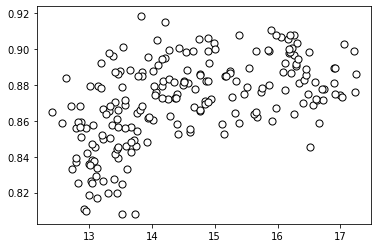

In [81]:
# Cluster
# I would use perimeter and other 2 features to do cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.scatter(
   data_2.perimeter_P, data_2.compactness_C,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

C:\Users\96290\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


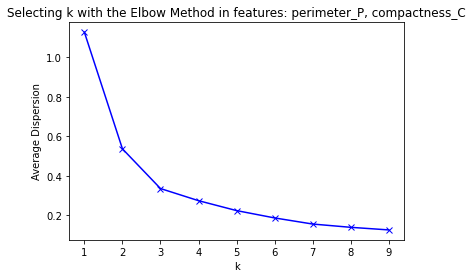

In [95]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
K = range(1, 10)

X_p_c = data_2[['perimeter_P', 'compactness_C']]
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_p_c)
    meandistortions.append(sum(np.min(cdist(X_p_c, kmeans.cluster_centers_, 'euclidean'), axis=1))/X_p_c.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method in features: perimeter_P, compactness_C')
plt.show()

In [ ]:
# The above graph shows that when the number of clusters is 1 or 2, the average distance of the samples from 
# their class clusters decreases rapidly, which indicates that changing the K value will change the overall 
# clustering structure significantly and means that the new number of clusters gives the algorithm more room 
# for optimization, and such a K value does not reflect the true number of class clusters. In contrast, 
# when K = 3, the decrease of the average distance has a significant slowdown, indicating that K = 3 is 
# the relatively optimal number of class clusters.

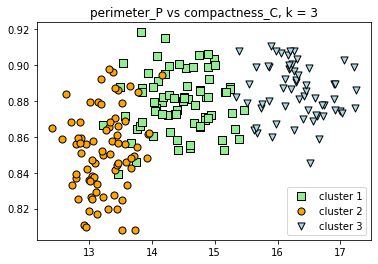

In [103]:
kmresult = KMeans(n_clusters=3, random_state=0).fit_predict(data_2)

plt.scatter(
    data_2.perimeter_P[kmresult == 0], data_2.compactness_C[kmresult == 0],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_2.perimeter_P[kmresult == 1], data_2.compactness_C[kmresult == 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_2.perimeter_P[kmresult == 2], data_2.compactness_C[kmresult == 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.title("perimeter_P vs compactness_C, k = 3")
plt.legend(scatterpoints=1)
plt.show()

# perimeter_P vs asymmetry_coefficient

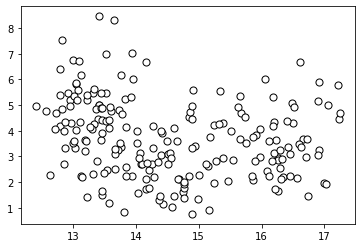

In [97]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.scatter(
   data_2.perimeter_P, data_2.asymmetry_coefficient,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

C:\Users\96290\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


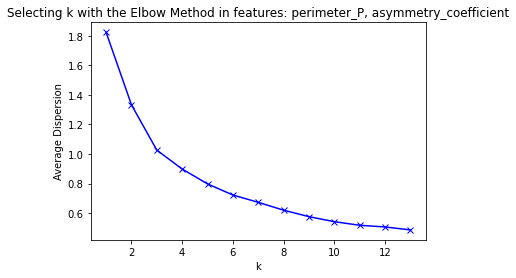

In [99]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
K = range(1, 14)

X_p_a = data_2[['perimeter_P', 'asymmetry_coefficient']]
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_p_a)
    meandistortions.append(sum(np.min(cdist(X_p_a, kmeans.cluster_centers_, 'euclidean'), axis=1))/X_p_a.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method in features: perimeter_P, asymmetry_coefficient')
plt.show()

In [ ]:
# k = 3 also is the elbow of the plot. I choose 3.

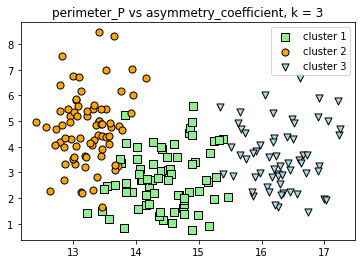

In [104]:
kmresult = KMeans(n_clusters=3, random_state=0).fit_predict(data_2)

plt.scatter(
    data_2.perimeter_P[kmresult == 0], data_2.asymmetry_coefficient[kmresult == 0],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_2.perimeter_P[kmresult == 1], data_2.asymmetry_coefficient[kmresult == 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_2.perimeter_P[kmresult == 2], data_2.asymmetry_coefficient[kmresult == 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.title("perimeter_P vs asymmetry_coefficient, k = 3")
plt.legend(scatterpoints=1)
plt.show()

In [ ]:
# task 2.b

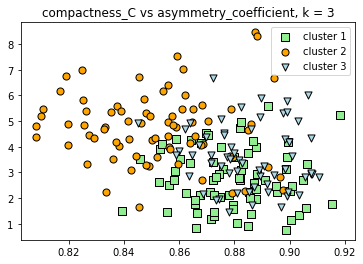

In [108]:
kmresult = KMeans(n_clusters=3, random_state=0).fit_predict(data_2)

plt.scatter(
    data_2.compactness_C[kmresult == 0], data_2.asymmetry_coefficient[kmresult == 0],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_2.compactness_C[kmresult == 1], data_2.asymmetry_coefficient[kmresult == 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_2.compactness_C[kmresult == 2], data_2.asymmetry_coefficient[kmresult == 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.title("compactness_C vs asymmetry_coefficient, k = 3")
plt.legend(scatterpoints=1)
plt.show()

In [109]:
# Task 3
# Part a
# scaling - standardize/normalize
from sklearn import datasets
from sklearn import preprocessing

iris = datasets.load_iris()
scaled_data = pd.DataFrame(preprocessing.StandardScaler().fit_transform(iris.data), columns=iris.feature_names)
scaled_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [110]:
# Part b
# Create a function to subset the data to include only 10th row data.
def subset_10(data):
    my_list = []
    for i in range(data.shape[0]):
        if i % 10 == 0:
            my_list.append(i)

    return data.loc[my_list]

In [111]:
# Then implement it in iris data.
iris_10th = subset_10(scaled_data)
iris_10th

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
10,-0.537178,1.479398,-1.283389,-1.315444
20,-0.537178,0.788808,-1.169714,-1.315444
30,-1.264185,0.098217,-1.226552,-1.315444
40,-1.021849,1.019004,-1.397064,-1.183812
50,1.401508,0.328414,0.535409,0.264142
60,-1.021849,-2.433947,-0.146641,-0.262387
70,0.068662,0.328414,0.592246,0.790671
80,-0.416010,-1.513160,0.023872,-0.130755
90,-0.416010,-1.052767,0.364896,0.000878


In [112]:
# Part c & d
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
print("Pairwise distance matrix with Manhattan distance:\n", manhattan_distances(iris_10th))

Pairwise distance matrix with Manhattan distance:
 [[0.         0.88073457 0.76421266 1.39796553 0.30963748 6.44800114
  5.8207628  5.69852073 5.56562382 5.57788703 7.55646985 6.8593046
  8.07989719 9.30734458 8.14255298]
 [0.88073457 0.         0.80426515 2.16502525 1.19037205 6.48805363
  6.58782252 5.73857322 5.60567631 5.61793952 7.59652235 6.89935709
  8.11994969 9.34739708 8.18260547]
 [0.76421266 0.80426515 0.         1.47443495 1.07385014 5.68378848
  5.78355737 4.93430807 4.80141116 4.81367437 6.7922572  6.09509194
  7.31568454 8.54313192 7.37834032]
 [1.39796553 2.16502525 1.47443495 0.         1.46526727 6.23743636
  4.90746876 5.48795595 4.89466551 4.90692872 7.80629861 6.64873982
  7.86933242 8.63638627 7.47159467]
 [0.30963748 1.19037205 1.07385014 1.46526727 0.         6.49437425
  5.62480018 5.74489384 5.61199693 5.62426014 7.60284297 6.90567771
  8.12627031 9.35371769 8.18892609]
 [6.44800114 6.48805363 5.68378848 6.23743636 6.49437425 0.
  6.39429646 1.91621274 4.5655

In [113]:
print("Pairwise distance matrix with Euclidean distance:\n", euclidean_distances(iris_10th))

Pairwise distance matrix with Euclidean distance:
 [[0.         0.58934504 0.46281731 0.99644652 0.18772101 3.43367023
  3.80409426 3.09624142 3.14817673 3.02775297 4.28110307 3.65937458
  4.3414483  4.74413352 4.32333497]
 [0.58934504 0.         0.69988351 1.56186742 0.69073704 3.29945214
  4.23677979 3.10572572 3.47598982 3.29789118 4.21245903 3.59192444
  4.23886147 4.69128249 4.26680226]
 [0.46281731 0.69988351 0.         1.00433309 0.59742106 3.06153584
  3.57444601 2.84942583 2.85339689 2.73748235 4.0473925  3.36702399
  4.04046336 4.36372179 4.03211827]
 [0.99644652 1.56186742 1.00433309 0.         0.97620536 3.57190523
  2.95731658 3.09406135 2.50658857 2.51188665 4.35150188 3.72388246
  4.42710734 4.68518655 4.34225161]
 [0.18772101 0.69073704 0.59742106 0.97620536 0.         3.4900712
  3.78621939 3.08578435 3.14752065 3.02774989 4.26797426 3.66778286
  4.35454235 4.78873108 4.32495657]
 [3.43367023 3.29945214 3.06153584 3.57190523 3.4900712  0.
  3.77435081 1.43420466 2.6669